In [1]:
#Dependencies
from citipy import citipy
from config_keys import OpWea_key
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [26]:
#Random generate latitude and longitude numbers then lookup nearest city using citipy

# Empty series to hold names of cities and countries
randCity = []
randCountry = []
loopcnt = 0

#Loop through untill 500 unique city names are found
while len(randCity) < 25 :
    # Loop counter just to track number of loops made
    loopcnt +=1
    
    # Random generate latitude
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    #print(f"The lattitude is: {lat}") 
    
    # Random generate longitude
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    #print(f"The longitude is: {lng}") 
    
    # Call citipy to get nearest city based on random lat and lng
    city = citipy.nearest_city(lat, lng)
    
    # Test to see if the random city is already in the list, if not, add to the city and country lists
    foundCity = False
    for j in range(len(randCity)):
        if city.city_name == randCity[j]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)

In [27]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = OpWea_key
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="


In [29]:
# Loop through the list of cities and perform a request for data on each
search_data = []
cityList = []
countryList = []
query_urlList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in randCity:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
        query_urlList.append(query_url+city)
    else:
        print(f"     No weather record found for city: {city}")
          
print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: riyadh
     Record found for city: riyadh    city id: 108410
Processing record 2 for the city: marcona
     No weather record found for city: marcona
Processing record 3 for the city: det udom
     Record found for city: det udom    city id: 1610940
Processing record 4 for the city: dikson
     Record found for city: dikson    city id: 1507390
Processing record 5 for the city: sumbawa
     Record found for city: sumbawa    city id: 1626185
Processing record 6 for the city: udachnyy
     Record found for city: udachnyy    city id: 2014624
Processing record 7 for the city: norman wells
     Record found for city: norman wells    city id: 6089245
Processing record 8 for the city: barrow
     Record found for city: barrow    city id: 5880054
Processing record 9 for the city: kalmunai
     Record found for city: kalmunai    city id: 1242110
Processing record 10 for the city: boa

In [30]:
#print(json.dumps(search_data[2], indent=4))
len(search_data)

21

In [33]:
# Use list comprehension to gather necessary data series

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [34]:
# Create data frame with aggregated data
weather_data = pd.DataFrame({"cityName":cityList,
                            "country":countryList,
                            "url": query_urlList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})
weather_data.head()

,cityName,cloudiness,country,humidity,lat,lng,temp,url,winds
0,riyadh,0,sa,59,24.69,46.72,62.60,http://api.openweathermap.org/data/2.5/weather...,6.93
1,det udom,40,th,62,14.91,105.08,87.80,http://api.openweathermap.org/data/2.5/weather...,4.70
2,dikson,64,ru,100,73.51,80.55,15.18,http://api.openweathermap.org/data/2.5/weather...,4.85
3,sumbawa,68,id,99,-8.50,117.43,82.23,http://api.openweathermap.org/data/2.5/weather...,2.39
4,udachnyy,80,ru,73,66.42,112.40,-0.17,http://api.openweathermap.org/data/2.5/weather...,3.85


In [35]:
# Force column order
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds","url"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds,url
0,riyadh,sa,24.69,46.72,62.60,59,0,6.93,http://api.openweathermap.org/data/2.5/weather...
1,det udom,th,14.91,105.08,87.80,62,40,4.70,http://api.openweathermap.org/data/2.5/weather...
2,dikson,ru,73.51,80.55,15.18,100,64,4.85,http://api.openweathermap.org/data/2.5/weather...
3,sumbawa,id,-8.50,117.43,82.23,99,68,2.39,http://api.openweathermap.org/data/2.5/weather...
4,udachnyy,ru,66.42,112.40,-0.17,73,80,3.85,http://api.openweathermap.org/data/2.5/weather...


In [36]:
# Save weather data to csv file
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

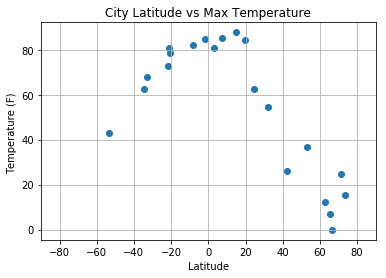

In [42]:
# Build a scatter plot for each data type

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_MaxTemp.png")

# Show plot
plt.show()

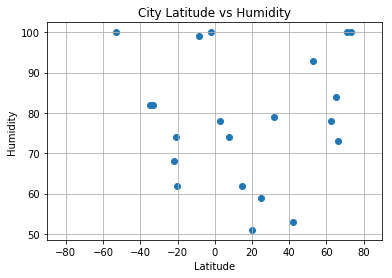

In [43]:
# Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

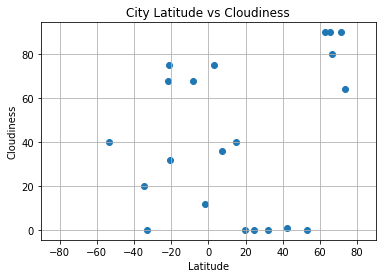

In [44]:
# Latitude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

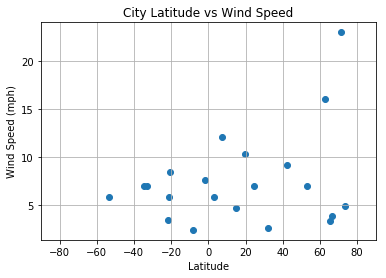

In [45]:
# Latitude vs Wind Speed
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()